In [44]:
import __init__
from __init__ import DATA_PATH
from __init__ import PACKAGE_PATH
from dce import DCE
from cluster import Cluster
import utilities
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from keras import Model
%matplotlib inline

In [2]:
from descriptor import mordredDescriptors as mDesc

(array([756.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 307.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

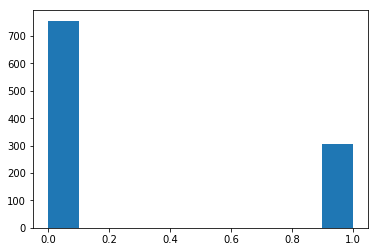

In [3]:
df = pd.read_csv(os.path.join(DATA_PATH,'BOD_RDKit_Descriptors_1063.csv'))
df['cleaned_bod'] = utilities.clean_out_of_bound(df['value (% BOD)'])

df['bi_class_partition'] = utilities.divide_classes(df['cleaned_bod'], [60])
true_label_biclass = df['bi_class_partition'].values
plt.hist(df['bi_class_partition'])

In [4]:
mdescriptor = mDesc.batch_compute_all_descriptors(df['SMILES'])

 42%|████▏     | 450/1063 [00:07<00:10, 56.59it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 60%|██████    | 640/1063 [00:12<00:25, 16.70it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 70%|███████   | 745/1063 [00:14<00:06, 50.13it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 79%|███████▉  | 845/1063 [00:16<00:06, 35.34it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 91%|█████████▏| 970/1063 [00:19<00:03, 24.27it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 94%|█████████▍| 999/1063 [00:20<00:02, 31.49it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 96%|█████████▌| 1017/1063 [00:20<00:01, 29.87it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 98%|█████████▊| 1045/1063 [00:21<00:00, 25.65it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1063/1063 [00:22<00:00, 47.75it/s]


In [5]:
len(mdescriptor.loc[0])

1613

### drop colums have NA values

In [6]:
for col in mdescriptor.columns:
    if len(pd.value_counts(mdescriptor[col].isna())) > 1:
        mdescriptor = mdescriptor.drop(col, axis=1)


In [7]:
len(mdescriptor.loc[0])

1183

In [8]:
pd.value_counts(mdescriptor.dtypes)

float64    872
int64      309
bool         2
dtype: int64

In [9]:
feat_int = mdescriptor.select_dtypes(include=['int64'])
selected_int_feat = feat_int.loc[:,feat_int.nunique()>1]
len(selected_int_feat.loc[0])

187

In [10]:
feat_float = mdescriptor.select_dtypes(include=['float64'])
selected_float_feat = feat_float.loc[:,feat_float.nunique()>1]
len(selected_float_feat.loc[0])

794

In [11]:
#from keras.utils import normalize
from sklearn.preprocessing import normalize
norm_int_train = normalize(selected_int_feat.values, axis=0, norm='max')
norm_float_train = normalize(selected_float_feat.values, axis=0, norm='max')

In [12]:
norm_float_train

array([[0.1947295 , 0.23191848, 0.21617207, ..., 0.20576923, 0.15954367,
        0.20217391],
       [0.05949716, 0.08401263, 0.06137144, ..., 0.04038462, 0.1035246 ,
        0.07536232],
       [0.22232359, 0.25095942, 0.23656676, ..., 0.21538462, 0.18678699,
        0.2115942 ],
       ...,
       [0.31440957, 0.3242829 , 0.35724332, ..., 0.29230769, 0.25472501,
        0.34057971],
       [0.27961798, 0.29740931, 0.32580141, ..., 0.26346154, 0.1634599 ,
        0.2826087 ],
       [0.11509676, 0.15291337, 0.1209935 , ..., 0.08846154, 0.15137068,
        0.13478261]])

### test on baseline model

In [14]:
from cluster import KMeans

In [30]:
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.build_model()
kmeans_cluster.train_model(norm_int_train, true_labels=true_label_biclass)

Metrics without ture labels
silhouette score: 0.3067712391593553
calinski score: 183.29981611344087

Metric with True label
adjusted rand score: -0.05856611677922367 
fowlkes_mallows : 0.6031276299629709


(array([0, 0, 1, ..., 1, 1, 0], dtype=int32),
 {'silhouette_score': 0.3067712391593553,
  'calinski_score': 183.29981611344087,
  'adjusted_rand_score': -0.05856611677922367,
  'fowlkes_mallows_score': 0.6031276299629709})

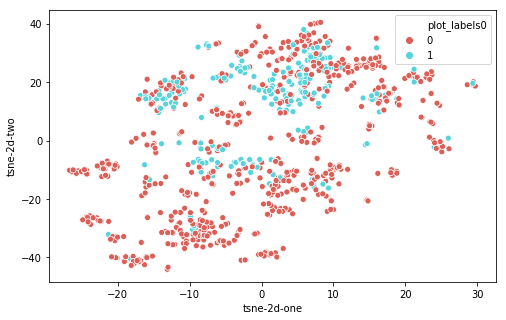

In [31]:
utilities.tsne_2d_visulization(norm_int_train, true_label_biclass, verbose=0)

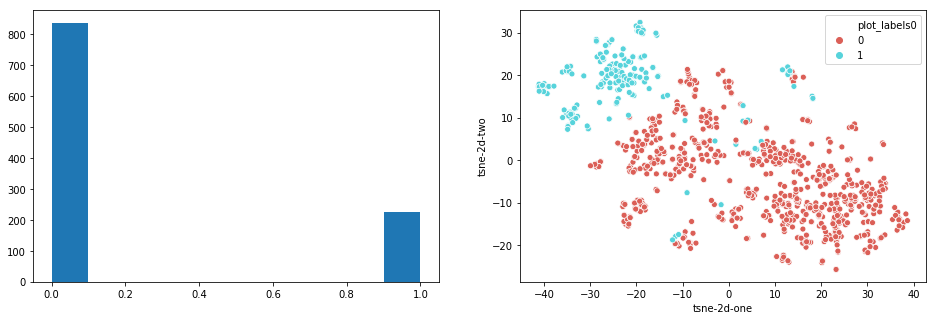

In [32]:
fig, ax=plt.subplots(1,2,figsize=(16,5))
ax[0].hist(kmeans_cluster.model.labels_)
utilities.tsne_2d_visulization(norm_int_train, kmeans_cluster.model.labels_, ax=ax[1], verbose=0)

In [29]:
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.build_model()
kmeans_cluster.train_model(norm_float_train, true_labels=true_label_biclass)

Metrics without ture labels
silhouette score: 0.8983505007029924
calinski score: 1030.7298674227284

Metric with True label
adjusted rand score: -0.007630041900512598 
fowlkes_mallows : 0.7602353091572206


(array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 {'silhouette_score': 0.8983505007029924,
  'calinski_score': 1030.7298674227284,
  'adjusted_rand_score': -0.007630041900512598,
  'fowlkes_mallows_score': 0.7602353091572206})

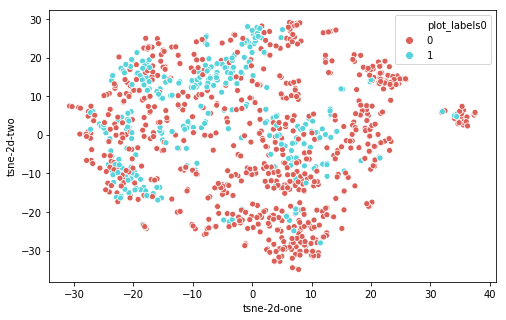

In [33]:
utilities.tsne_2d_visulization(norm_float_train, true_label_biclass, verbose=0)

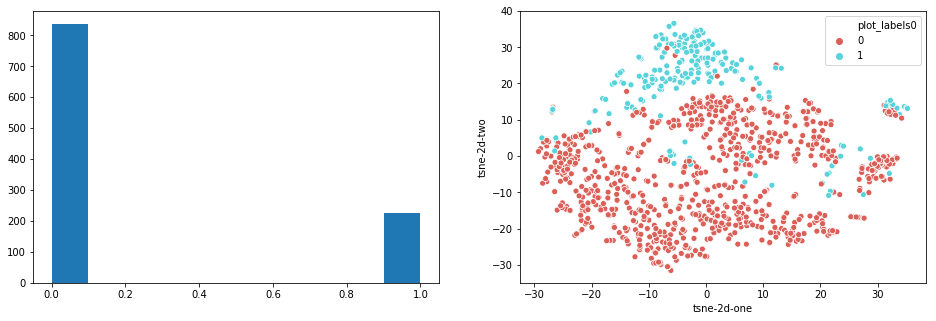

In [34]:
fig, ax=plt.subplots(1,2,figsize=(16,5))
ax[0].hist(kmeans_cluster.model.labels_)
utilities.tsne_2d_visulization(norm_float_train, kmeans_cluster.model.labels_, ax=ax[1], verbose=0)

### test autoencoder

In [35]:
from dimreducer import DeepAutoEncoder as DAE

In [37]:
dims = [187, 90, 45]
autoencoder = DAE(dims)
autoencoder.build_model()
history = autoencoder.train_model(norm_int_train, norm_feature=False, epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1063/1063 [==============================] - 0s 292us/step - loss: 0.0268
Epoch 2/50
1063/1063 [==============================] - 0s 15us/step - loss: 0.0142
Epoch 3/50
1063/1063 [==============================] - 0s 14us/step - loss: 0.0119
Epoch 4/50
1063/1063 [==============================] - 0s 15us/step - loss: 0.0110
Epoch 5/50
1063/1063 [==============================] - 0s 15us/step - loss: 0.0102
Epoch 6/50
1063/1063 [==============================] - 0s 14us/step - loss: 0.0094
Epoch 7/50
1063/1063 [==============================] - 0s 14us/step - loss: 0.0086
Epoch 8/50
1063/1063 [==============================] - 0s 14us/step - loss: 0.0082
Epoch 9/50
1063/1063 [==============================] - 0s 16us/step - loss: 0.0077
Epoch 10/50
1063/1063 [==============================] - 0s 14us/step - loss: 0.0073
Epoch 11/50
1063/1063 [==============================] - 0s 14us/step - loss: 0.0070
Epoch 12/50
1063/1063 [==

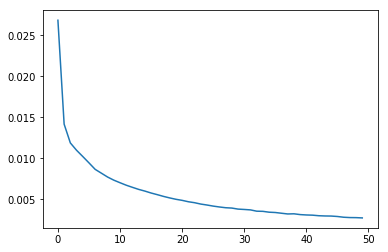

In [38]:
plt.plot(history.history['loss'])

In [39]:
dims = [794, 200, 50]
autoencoder = DAE(dims)
autoencoder.build_model()
history = autoencoder.train_model(norm_float_train, norm_feature=False, epochs=50)

Epoch 1/50
1063/1063 [==============================] - 0s 338us/step - loss: 0.1541
Epoch 2/50
1063/1063 [==============================] - 0s 46us/step - loss: 0.1166
Epoch 3/50
1063/1063 [==============================] - 0s 48us/step - loss: 0.0975
Epoch 4/50
1063/1063 [==============================] - 0s 48us/step - loss: 0.0922
Epoch 5/50
1063/1063 [==============================] - 0s 45us/step - loss: 0.0879
Epoch 6/50
1063/1063 [==============================] - 0s 50us/step - loss: 0.0858
Epoch 7/50
1063/1063 [==============================] - 0s 48us/step - loss: 0.0844
Epoch 8/50
1063/1063 [==============================] - 0s 50us/step - loss: 0.0838
Epoch 9/50
1063/1063 [==============================] - 0s 47us/step - loss: 0.0829
Epoch 10/50
1063/1063 [==============================] - 0s 45us/step - loss: 0.0813
Epoch 11/50
1063/1063 [==============================] - 0s 47us/step - loss: 0.0805
Epoch 12/50
1063/1063 [==============================] - 0s 44us/step - l

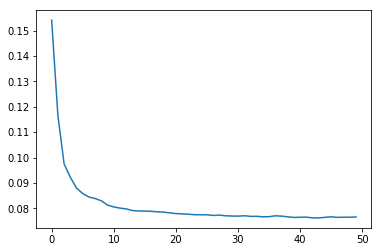

In [40]:
plt.plot(history.history['loss'])

## test dce

### Using int feature

In [46]:
autoencoder_dims = [187, 90, 45]
dce = DCE(autoencoder_dims, n_clusters=2, update_interval=25)
cl_weights = np.arange(0.1, 1, 0.1)
results = []
hidden_feats = []

for cl_weight in cl_weights:
    dce.build_model(norm=True)
    print('Start to train model with cluster weight: ' + str(cl_weight))
    result_i = dce.train_model(norm_int_train,clustering_loss='kld', 
                               decoder_loss='mse',
                               training_prints=False,
                               norm_feature=False,
                               clustering_loss_weight=cl_weight)
    
    encoder = Model(inputs=dce.model.input, 
                    outputs=dce.model.get_layer(name='embedding_layer').output)
    
    hidden_feats.append(encoder.predict(norm_int_train))
    results.append(result_i)
    print('Training finished and the results are recorded')

Start to train model with cluster weight: 0.1
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.2
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.30000000000000004
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.4
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.5
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.6
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.7000000000000001

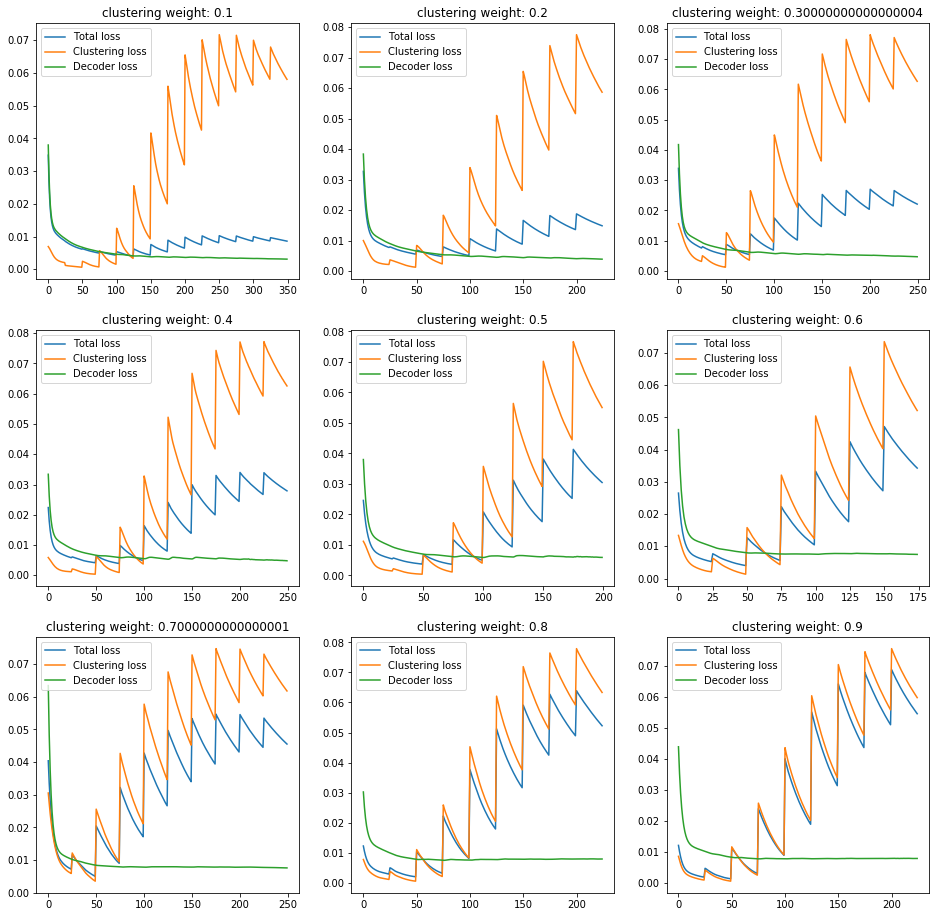

In [47]:
fig, ax =plt.subplots(3,3,figsize=(16,16))

for i in range(9):
    row_i = int(i/3)
    column_j = i % 3

    ax[row_i][column_j].plot(results[i][1][0],label='Total loss')
    ax[row_i][column_j].plot(results[i][1][1],label='Clustering loss')
    ax[row_i][column_j].plot(results[i][1][2],label='Decoder loss')
    ax[row_i][column_j].legend()
    ax[row_i][column_j].set_title('clustering weight: ' + str(cl_weights[i]))

Text(0.5, 1.0, 'fowlkes_mallows_score')

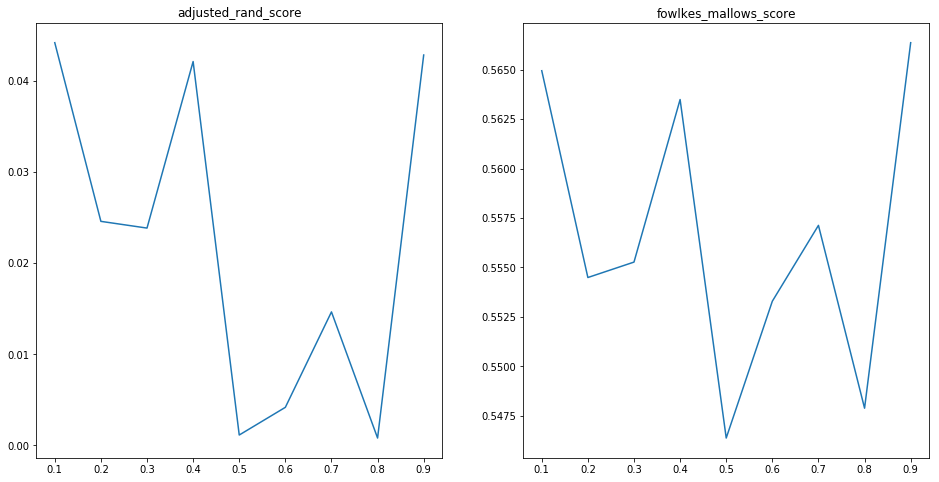

In [49]:
adjusted_rand_score = []
fowlkes_mallows_score = []
for i in range(9):
    metric_dict = Cluster.true_label_metrics(true_label_biclass,results[i][0],print_metric=False)
    adjusted_rand_score.append(metric_dict['adjusted_rand_score'])
    fowlkes_mallows_score.append(metric_dict['fowlkes_mallows_score'])

fig, ax =plt.subplots(1,2,figsize=(16,8))

ax[0].plot(cl_weights,adjusted_rand_score)
ax[0].set_title('adjusted_rand_score')

ax[1].plot(cl_weights,fowlkes_mallows_score)
ax[1].set_title('fowlkes_mallows_score')

#### visualized by true label

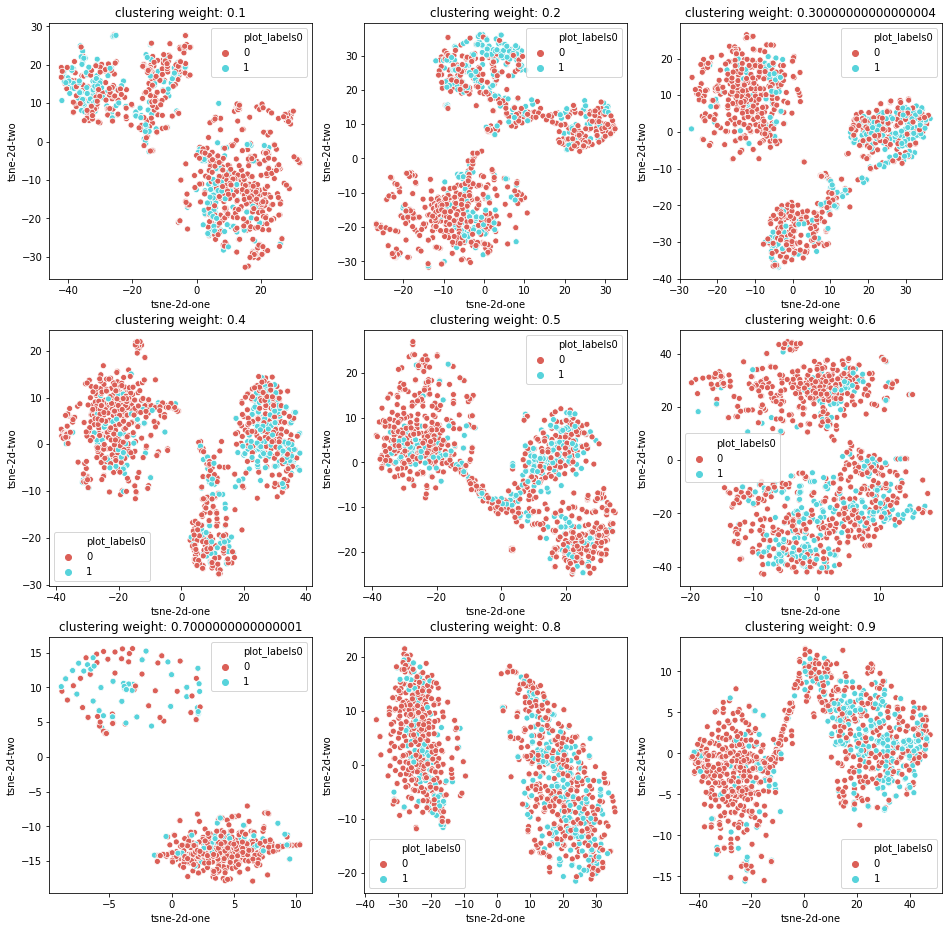

In [51]:
fig, ax =plt.subplots(3,3,figsize=(16,16))

for i in range(9):
    row_i = int(i/3)
    column_j = i % 3
    utilities.tsne_2d_visulization(input_feat=hidden_feats[i], 
                                   plot_labels=true_label_biclass,
                                   verbose=0,
                                   ax=ax[row_i][column_j])
    ax[row_i][column_j].set_title('clustering weight: ' + str(cl_weights[i]))

#### visualized by predicted label

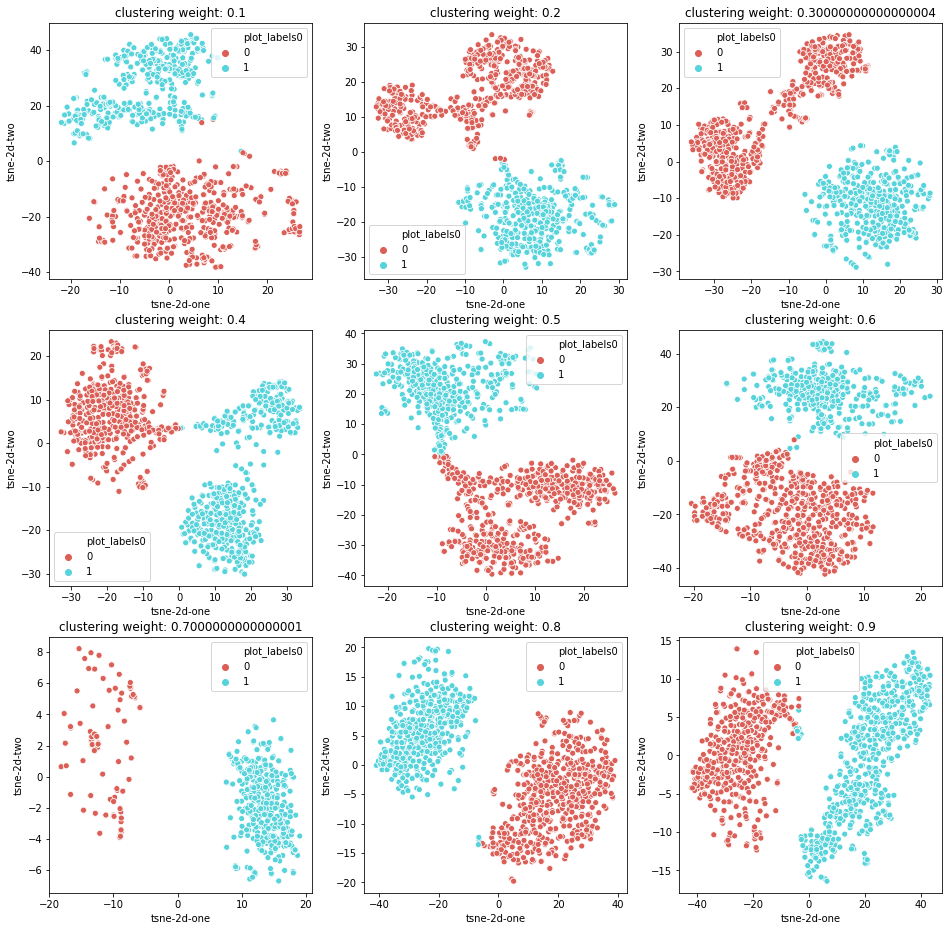

In [52]:
fig, ax =plt.subplots(3,3,figsize=(16,16))

for i in range(9):
    row_i = int(i/3)
    column_j = i % 3
    utilities.tsne_2d_visulization(input_feat=hidden_feats[i], 
                                   plot_labels=results[i][0],
                                   verbose=0,
                                   ax=ax[row_i][column_j])
    ax[row_i][column_j].set_title('clustering weight: ' + str(cl_weights[i]))

### Using Float feature

In [53]:
autoencoder_dims = [794, 200, 50]
dce = DCE(autoencoder_dims, n_clusters=2, update_interval=25)
cl_weights = np.arange(0.1, 1, 0.1)
results = []
hidden_feats = []

for cl_weight in cl_weights:
    dce.build_model(norm=True)
    print('Start to train model with cluster weight: ' + str(cl_weight))
    result_i = dce.train_model(norm_float_train,clustering_loss='kld', 
                               decoder_loss='mse',
                               training_prints=False,
                               norm_feature=False,
                               clustering_loss_weight=cl_weight)

    encoder = Model(inputs=dce.model.input, 
                    outputs=dce.model.get_layer(name='embedding_layer').output)
    
    hidden_feats.append(encoder.predict(norm_float_train))
    results.append(result_i)
    print('Training finished and the results are recorded')

Start to train model with cluster weight: 0.1
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.2
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.30000000000000004
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.4
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.5
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.6
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.7000000000000001

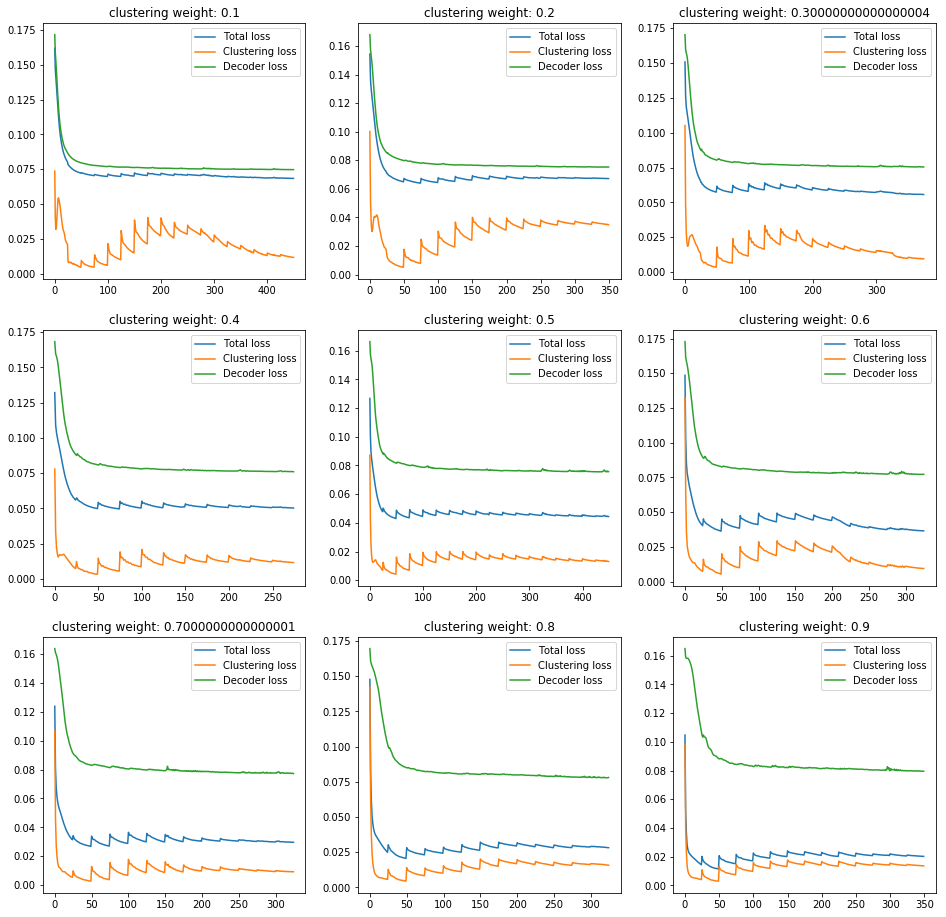

In [54]:
fig, ax =plt.subplots(3,3,figsize=(16,16))
for i in range(9):
    row_i = int(i/3)
    column_j = i % 3
    ax[row_i][column_j].plot(results[i][1][0],label='Total loss')
    ax[row_i][column_j].plot(results[i][1][1],label='Clustering loss')
    ax[row_i][column_j].plot(results[i][1][2],label='Decoder loss')
    ax[row_i][column_j].legend()
    ax[row_i][column_j].set_title('clustering weight: ' + str(cl_weights[i]))

Text(0.5, 1.0, 'fowlkes_mallows_score')

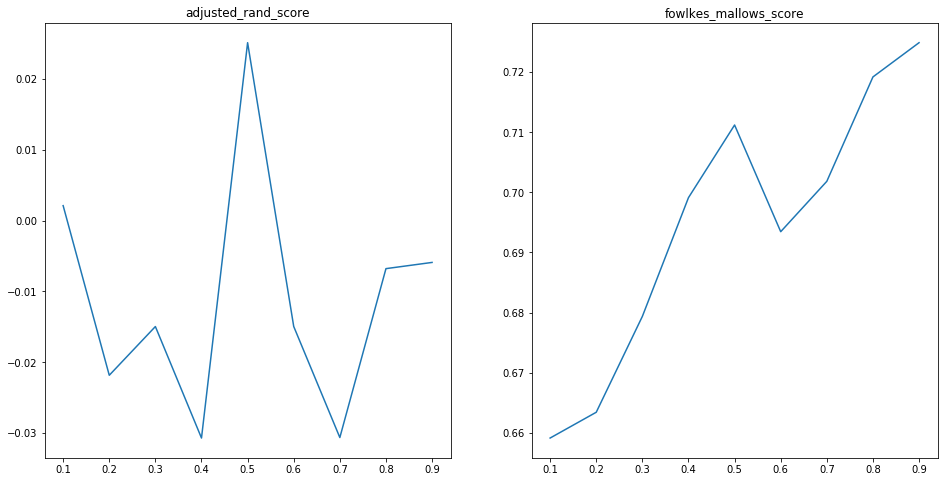

In [55]:
adjusted_rand_score = []
fowlkes_mallows_score = []
for i in range(9):
    metric_dict = Cluster.true_label_metrics(true_label_biclass,results[i][0],print_metric=False)
    adjusted_rand_score.append(metric_dict['adjusted_rand_score'])
    fowlkes_mallows_score.append(metric_dict['fowlkes_mallows_score'])

fig, ax =plt.subplots(1,2,figsize=(16,8))

ax[0].plot(cl_weights,adjusted_rand_score)
ax[0].set_title('adjusted_rand_score')

ax[1].plot(cl_weights,fowlkes_mallows_score)
ax[1].set_title('fowlkes_mallows_score')

#### visualized by true label

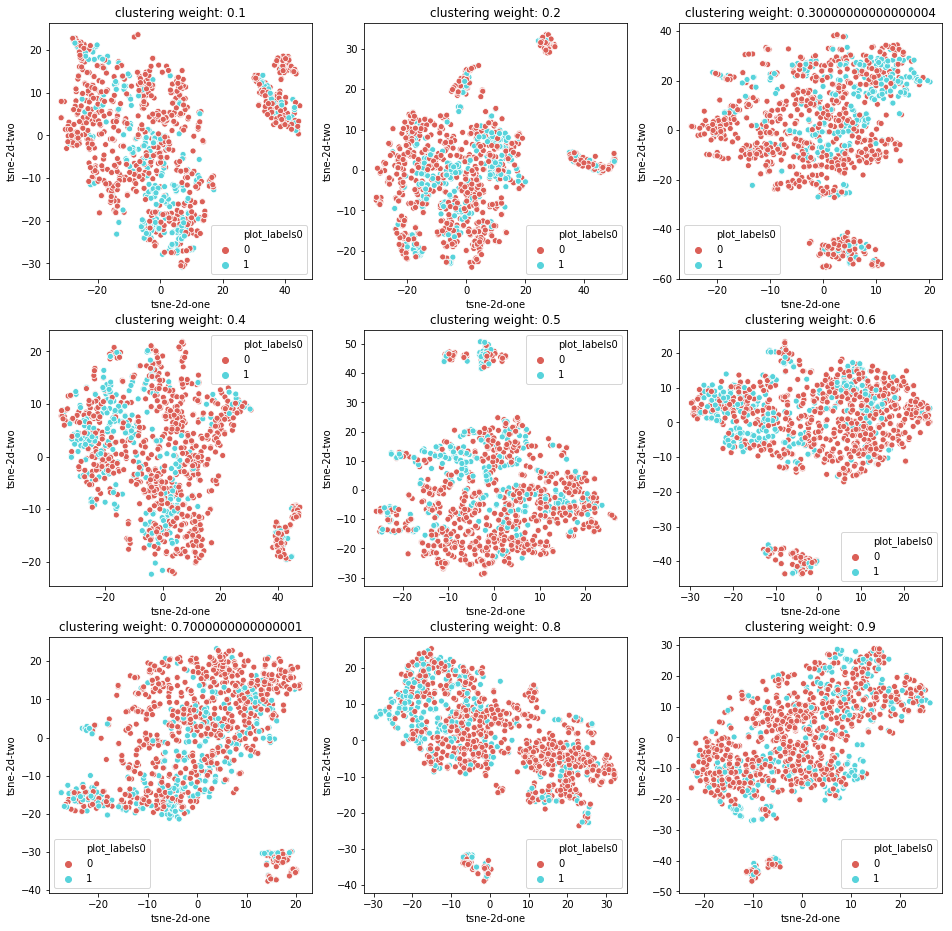

In [56]:
fig, ax =plt.subplots(3,3,figsize=(16,16))

for i in range(9):
    row_i = int(i/3)
    column_j = i % 3
    utilities.tsne_2d_visulization(input_feat=hidden_feats[i], 
                                   plot_labels=true_label_biclass,
                                   verbose=0,
                                   ax=ax[row_i][column_j])
    ax[row_i][column_j].set_title('clustering weight: ' + str(cl_weights[i]))

#### visualized by predicted label

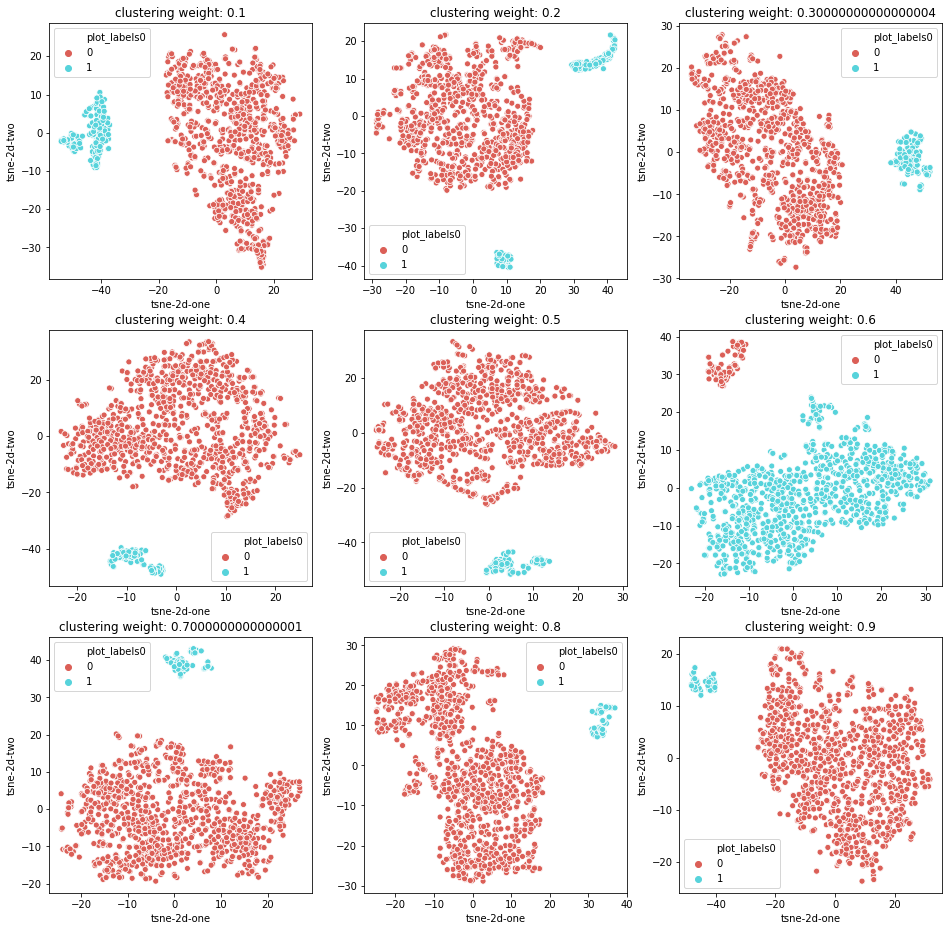

In [57]:
fig, ax =plt.subplots(3,3,figsize=(16,16))

for i in range(9):
    row_i = int(i/3)
    column_j = i % 3
    utilities.tsne_2d_visulization(input_feat=hidden_feats[i], 
                                   plot_labels=results[i][0],
                                   verbose=0,
                                   ax=ax[row_i][column_j])
    ax[row_i][column_j].set_title('clustering weight: ' + str(cl_weights[i]))